In [72]:
import pandas as pd
import numpy as np
import toml
from os.path import join
import glob
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid")

In [39]:
jobs_max_size = 128
machines_max_size = 16
dir_path = r'../data/auto/'

In [50]:
sizes = lambda size: [int(2**i) for i in range(1, int(np.log2(size)+1))]
job_sizes = sizes(jobs_max_size)
machine_sizes = sizes(machines_max_size)
conflicting_machines = {
    1: [],
    2: [],
    4: [(1, 2)],
    8: [(1, 2), (5, 7)],
    16: [(1, 2), (5, 7), (9, 10), (13, 14)],
    32: [(1, 2), (5, 7), (9, 10), (13, 14), (15, 16), (17, 18), (20, 25), (27, 30)]
}

for jobs_cnt in job_sizes:
    for machines_cnt in machine_sizes:
        file_name = f'{jobs_cnt}j{machines_cnt}m0'
        csv_file_path = f'{join(dir_path, file_name)}.csv'

        np.savetxt(
            csv_file_path,
            np.random.rand(jobs_cnt, machines_cnt) * 100,
            fmt='%.2f',
            delimiter=',')

        toml_dict = {
            'title': file_name,
            'info': f'{jobs_cnt} jobs {machines_cnt} machines example 0',
            'files':
            {
                'data': csv_file_path,
                'processing_times': csv_file_path
            },
            'problem_data':
            {
                'index_cols': [],
                'grouping_cols': [],
                'conflicting_machines': conflicting_machines[machines_cnt]
            },
            'algorithm_config':
            {
                'beam_witdh': 5
            },
        }

        with open(join(dir_path, f'{file_name}.toml'), 'w') as f:
            f.write(toml.dumps(toml_dict).replace(',]', ' ]'))

In [51]:
glob.glob(r'../data/auto/*.toml')

['../data/auto\\128j16m0.toml',
 '../data/auto\\128j2m0.toml',
 '../data/auto\\128j4m0.toml',
 '../data/auto\\128j8m0.toml',
 '../data/auto\\16j16m0.toml',
 '../data/auto\\16j2m0.toml',
 '../data/auto\\16j4m0.toml',
 '../data/auto\\16j8m0.toml',
 '../data/auto\\2j16m0.toml',
 '../data/auto\\2j2m0.toml',
 '../data/auto\\2j4m0.toml',
 '../data/auto\\2j8m0.toml',
 '../data/auto\\32j16m0.toml',
 '../data/auto\\32j2m0.toml',
 '../data/auto\\32j4m0.toml',
 '../data/auto\\32j8m0.toml',
 '../data/auto\\4j16m0.toml',
 '../data/auto\\4j2m0.toml',
 '../data/auto\\4j4m0.toml',
 '../data/auto\\4j8m0.toml',
 '../data/auto\\64j16m0.toml',
 '../data/auto\\64j2m0.toml',
 '../data/auto\\64j4m0.toml',
 '../data/auto\\64j8m0.toml',
 '../data/auto\\8j16m0.toml',
 '../data/auto\\8j2m0.toml',
 '../data/auto\\8j4m0.toml',
 '../data/auto\\8j8m0.toml']

In [68]:
op_times_df = (
    pd.read_csv('testing_times.csv', usecols=['0','1','2'])
    .rename(columns={'0': 'file', '1': 'prep_time', '2': 'max_end_time'})
)
op_times_df

,file,prep_time,max_end_time
0,../data/auto\128j16m0.toml,4523.627438,972069.0
1,../data/auto\128j2m0.toml,431.677663,824552.0
2,../data/auto\128j4m0.toml,1006.711800,882949.0
3,../data/auto\128j8m0.toml,1934.950913,909126.0
4,../data/auto\16j16m0.toml,1.690686,143070.0
5,../data/auto\16j2m0.toml,0.205009,109056.0
6,../data/auto\16j4m0.toml,0.437964,115703.0
7,../data/auto\16j8m0.toml,0.896021,133131.0
8,../data/auto\2j16m0.toml,0.005046,19867.0
9,../data/auto\2j2m0.toml,0.001276,7103.0


,0,1,2
0,../data/auto\128j16m0.toml,4523.627438,972069.0
1,../data/auto\128j2m0.toml,431.677663,824552.0
2,../data/auto\128j4m0.toml,1006.711800,882949.0
3,../data/auto\128j8m0.toml,1934.950913,909126.0
4,../data/auto\16j16m0.toml,1.690686,143070.0
5,../data/auto\16j2m0.toml,0.205009,109056.0
6,../data/auto\16j4m0.toml,0.437964,115703.0
7,../data/auto\16j8m0.toml,0.896021,133131.0
8,../data/auto\2j16m0.toml,0.005046,19867.0
9,../data/auto\2j2m0.toml,0.001276,7103.0


In [79]:
op_times_df['jobs'] = op_times_df['file'].str.extract(r'^[^\d]+(\d+)j.*$').astype(np.int)
op_times_df['machines'] = op_times_df['file'].str.extract(r'^[^\d]+\d+j(\d+)m.*$').astype(np.int)
op_times_df['cells'] = op_times_df.jobs * op_times_df.machines
op_times_df


,file,prep_time,max_end_time,jobs,machines,cells
0,../data/auto\128j16m0.toml,4523.627438,972069.0,128,16,2048
1,../data/auto\128j2m0.toml,431.677663,824552.0,128,2,256
2,../data/auto\128j4m0.toml,1006.711800,882949.0,128,4,512
3,../data/auto\128j8m0.toml,1934.950913,909126.0,128,8,1024
4,../data/auto\16j16m0.toml,1.690686,143070.0,16,16,256
5,../data/auto\16j2m0.toml,0.205009,109056.0,16,2,32
6,../data/auto\16j4m0.toml,0.437964,115703.0,16,4,64
7,../data/auto\16j8m0.toml,0.896021,133131.0,16,8,128
8,../data/auto\2j16m0.toml,0.005046,19867.0,2,16,32
9,../data/auto\2j2m0.toml,0.001276,7103.0,2,2,4


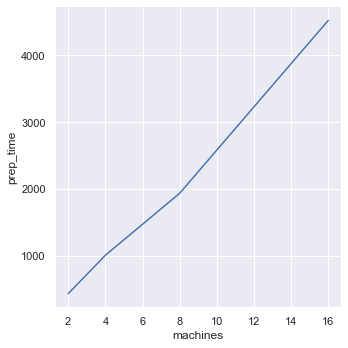

In [101]:
g = sns.relplot(x="machines", y="prep_time", data=op_times_df[op_times_df.jobs==128], kind="line",)
# g.fig.autofmt_xdate()

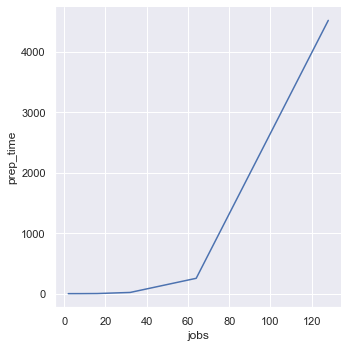

In [100]:
g = sns.relplot(x="jobs", y="prep_time", data=op_times_df[op_times_df.machines==16], kind="line",)
# g.fig.autofmt_xdate()